## Project - Customer Churn

In [1]:
# Run this cell to retrieve challenge data
! mkdir ../data 
! curl https://storage.googleapis.com/schoolofdata-datasets/Supervised-Machine-Learning.Customer-Churn/Telco-Customer-Churn.csv -o ../data/Telco-Customer-Churn.csv
! tree ..

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  954k  100  954k    0     0  3574k      0 --:--:-- --:--:-- --:--:-- 3588k
..
├── data
│   └── Telco-Customer-Churn.csv
└── src
    ├── Telco-Customer-Churn.csv
    └── customer_churn.ipynb

3 directories, 3 files


In [19]:
#TODO
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('../data/Telco-Customer-Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [21]:
df.TotalCharges = df.TotalCharges.apply(lambda num: float(num) if num.replace('.', '').isalnum() else np.nan)

In [24]:
df[df.TotalCharges.isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [25]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [27]:
df.Churn.value_counts()/ len(df)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

### Therefore my baseline is .73 accuracy (a model that always predict no would achieve such a score)

In [28]:
df.select_dtypes(include='object').nunique()

customerID          7043
gender                 2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
Churn                  2
dtype: int64

In [29]:
df_clean = df.dropna().drop(columns='customerID')

In [31]:
df_clean.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [37]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


<AxesSubplot:ylabel='Frequency'>

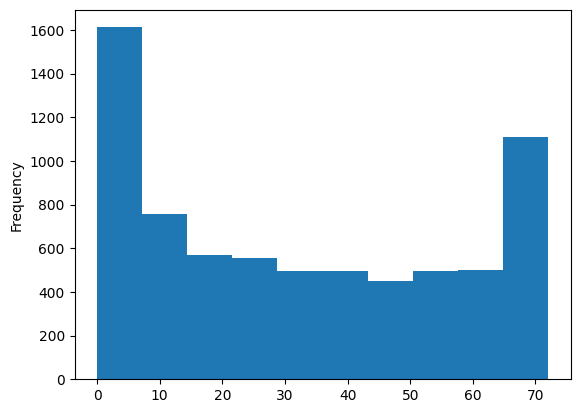

In [42]:
df.tenure.plot(kind='hist')

In [78]:
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.pipeline import make_pipeline, make_union
from sklearn.compose import make_column_selector, make_column_transformer

In [33]:
X = df_clean.drop(columns='Churn')
y = df_clean.Churn

In [43]:
lb = LabelBinarizer()
y_bin = lb.fit_transform(y)

In [47]:
lb.classes_

array(['No', 'Yes'], dtype='<U3')

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [49]:
cat_features_selector = make_column_selector(dtype_include='object')
num_features_selector = make_column_selector(dtype_include=['float64', 'int64'])

In [ ]:
preproc = make_column_transformer((StandardScaler(), num_features_selector), (OneHotEncoder(), cat_features_selector))
preproc

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x1771e7eb0>),
                                ('onehotencoder', OneHotEncoder(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x1771e7fd0>)])

In [54]:
X_train_scaled = preproc.fit_transform(X_train)
X_train_scaled.shape

(5625, 45)

### let's try to apply PCA

In [55]:
from sklearn.decomposition import PCA

In [100]:
preproc_with_pca = make_pipeline(preproc, PCA(n_components=30))
preproc_with_pca

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x1771e7eb0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x1771e7fd0>)])),
                ('pca', PCA(n_components=30))])

In [101]:
X_train_scaled = preproc_with_pca.fit_transform(X_train)
X_train_scaled.shape

(5625, 30)

### Basic modeling

In [59]:
from sklearn.linear_model import LogisticRegression

In [61]:
log_pipe = make_pipeline(preproc_with_pca, LogisticRegression())
log_pipe

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('standardscaler',
                                                                   StandardScaler(),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x1771e7eb0>),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x1771e7fd0>)])),
                                 ('pca', PCA(n_components=30))])),
                ('logisticregression', LogisticRegression())])

In [62]:
log_pipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('standardscaler',
                                                                   StandardScaler(),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x1771e7eb0>),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x1771e7fd0>)])),
                                 ('pca', PCA(n_components=30))])),
                ('logisticregression', LogisticRegression())])

In [63]:
log_pipe.score(X_test, y_test)

0.806680881307747

In [64]:
log_pipe.classes_

array(['No', 'Yes'], dtype=object)

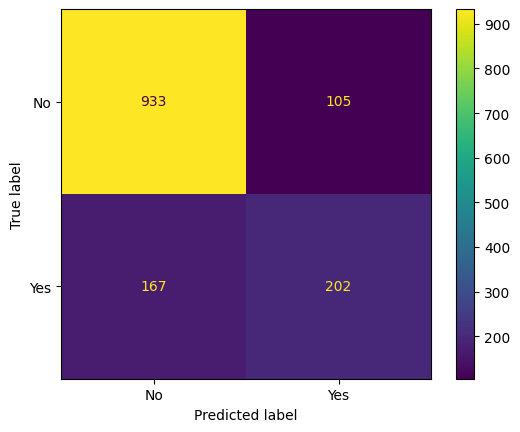

In [65]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = log_pipe.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=log_pipe.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=log_pipe.classes_)
disp.plot()
plt.show()

In [66]:
from sklearn.metrics import classification_report
y_true = y_test
y_pred = predictions
target_names = log_pipe.classes_
print(classification_report(y_true, y_pred, target_names=target_names))


              precision    recall  f1-score   support

          No       0.85      0.90      0.87      1038
         Yes       0.66      0.55      0.60       369

    accuracy                           0.81      1407
   macro avg       0.75      0.72      0.74      1407
weighted avg       0.80      0.81      0.80      1407



In [84]:
cv_results = cross_validate(log_pipe, X, y, cv=5, n_jobs=-1)
cv_results

{'fit_time': array([0.05507588, 0.05464292, 0.13073015, 0.12633228, 0.13123989]),
 'score_time': array([0.00692296, 0.00690293, 0.01016974, 0.0083518 , 0.00690007]),
 'test_score': array([0.80241649, 0.81236674, 0.78947368, 0.81009957, 0.8029872 ])}

In [85]:
print(f'Average fit time: {cv_results["fit_time"].mean()} sec')
print(f'Average test_score: {cv_results["test_score"].mean()}')

Average fit time: 0.09960422515869141 sec
Average test_score: 0.803468736383112


In [102]:
log_pipe.get_params()

{'memory': None,
 'steps': [('pipeline', Pipeline(steps=[('columntransformer',
                    ColumnTransformer(transformers=[('standardscaler',
                                                     StandardScaler(),
                                                     <sklearn.compose._column_transformer.make_column_selector object at 0x1771e7eb0>),
                                                    ('onehotencoder',
                                                     OneHotEncoder(),
                                                     <sklearn.compose._column_transformer.make_column_selector object at 0x1771e7fd0>)])),
                   ('pca', PCA(n_components=30))])),
  ('logisticregression', LogisticRegression())],
 'verbose': False,
 'pipeline': Pipeline(steps=[('columntransformer',
                  ColumnTransformer(transformers=[('standardscaler',
                                                   StandardScaler(),
                                                   <sk

In [104]:
params_grid = {'pipeline__pca__n_components': [10, 30, 40]}

### Model stacking

In [69]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [89]:
estimators = [('random_forest', RandomForestClassifier(class_weight='balanced')),
            ('naive_bayes', GaussianNB()),
            ('knn', KNeighborsClassifier()),
            ('xgboost', XGBClassifier(class_weight='balanced'))]

stacked_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(class_weight='balanced'))
stacked_model

StackingClassifier(estimators=[('random_forest',
                                RandomForestClassifier(class_weight='balanced')),
                               ('naive_bayes', GaussianNB()),
                               ('knn', KNeighborsClassifier()),
                               ('xgboost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              class_weight='balanced',
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable...
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              predictor=None, random_state=None,
                                              reg_alpha=None, ...))],
                   final_estimator=LogisticRegression(class_weight='balanced'))

In [105]:
stacked_pipe = make_pipeline(preproc_with_pca, stacked_model)
stacked_pipe

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('standardscaler',
                                                                   StandardScaler(),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x1771e7eb0>),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x1771e7fd0>)])),
                                 ('pca', PCA(n_components=...
                                                               interaction_constraints=None,
                                                               learning_rate=None,
                                                               max_bin=None,
                                                               max_cat_to_onehot=None,
                                                               max_delta_step=None,
                                                               max_depth=None,
                                                               max_leaves=None,
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               n_estimators=100,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               predictor=None,
                                                               random_state=None,
                                                               reg_alpha=None, ...))],
                                    final_estimator=LogisticRegression(class_weight='balanced')))])

In [106]:
stacked_pipe.fit(X_train, y_train)

[18:29:57] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:30:04] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:30:05] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.mac

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('standardscaler',
                                                                   StandardScaler(),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x1771e7eb0>),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x1771e7fd0>)])),
                                 ('pca', PCA(n_components=...
                                                               interaction_constraints=None,
                                                               learning_rate=None,
                                                               max_bin=None,
                                                               max_cat_to_onehot=None,
                                                               max_delta_step=None,
                                                               max_depth=None,
                                                               max_leaves=None,
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               n_estimators=100,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               predictor=None,
                                                               random_state=None,
                                                               reg_alpha=None, ...))],
                                    final_estimator=LogisticRegression(class_weight='balanced')))])

In [107]:
stacked_pipe.score(X_test, y_test)

0.7746979388770433

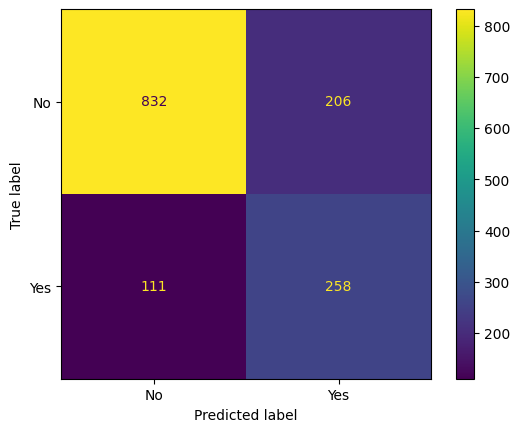

In [108]:
predictions = stacked_pipe.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=stacked_pipe.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=stacked_pipe.classes_)
disp.plot()
plt.show()

In [94]:
y_true = y_test
y_pred = predictions
target_names = stacked_pipe.classes_
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

          No       0.88      0.80      0.84      1038
         Yes       0.55      0.69      0.61       369

    accuracy                           0.77      1407
   macro avg       0.71      0.75      0.72      1407
weighted avg       0.79      0.77      0.78      1407



In [95]:
cv_results = cross_validate(stacked_pipe, X, y, cv=5, n_jobs=-1)
cv_results

[15:35:00] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:35:00] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:35:00] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.mac

{'fit_time': array([29.52305794, 29.66222692, 29.78794599, 29.58834291, 29.66757202]),
 'score_time': array([0.10641813, 0.07531309, 0.06380486, 0.08330607, 0.08128691]),
 'test_score': array([0.76830135, 0.7782516 , 0.75817923, 0.78378378, 0.77738265])}

In [96]:
print(f'Average fit time: {cv_results["fit_time"].mean()} sec')
print(f'Average test_score: {cv_results["test_score"].mean()}')

Average fit time: 29.645829153060912 sec
Average test_score: 0.7731797221977897
